In [1]:
import sys 
sys.path.append('./py_files')
from helper_funcs import *
from optics import *
from helper_funcs import load_dataset
from helper_funcs import get_cat_num_col_stats
from helper_funcs import get_ohe_df, get_le_df
from helper_funcs import num_col_standardize
from load_dataset import *
#
import pandas as pd
import os
# setting precision
pd.options.display.float_format = '{:,.2f}'.format

# single file first
PATH_TO_DATA = './datasets'
FILE_NAME = 'iris.arff'
FULL_PATH = PATH_TO_DATA + '/' + FILE_NAME

# qcut of all the dataframes dtypes count - Categorical Vs. Numerical
#cat_num_df = get_cat_num_col_stats(PATH=PATH_TO_DATA,graph='yes')
#col_type_nans = get_col_type_nans(PATH_TO_DATA)
# Loading dataset 
#df = load_dataset(FULL_PATH) #iris

# sepparating the dataframe into numerical and categorical
#df_num,df_cat = df.copy().drop('class',axis=1), df['class'].copy()

#transform categorical cols (ohe -> vals to cols of 0/1, le->classes(0,1,2..))
#df_cat_ohe = get_ohe_df(df, 'class')
#df_cat_le = get_le_df(df, 'class')

In [2]:
df, scaled_vals, Y_true = load_kropt(path='./datasets/kropt.arff')

In [3]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.2)
yhat = iso.fit_predict(scaled_vals)

mask = yhat != -1
X, Y = scaled_vals.iloc[mask, :], Y_true.iloc[mask]
Y = Y[Y<2500]
X = X[X<2500]

['minkowski', 'chebyshev', 'manhattan']


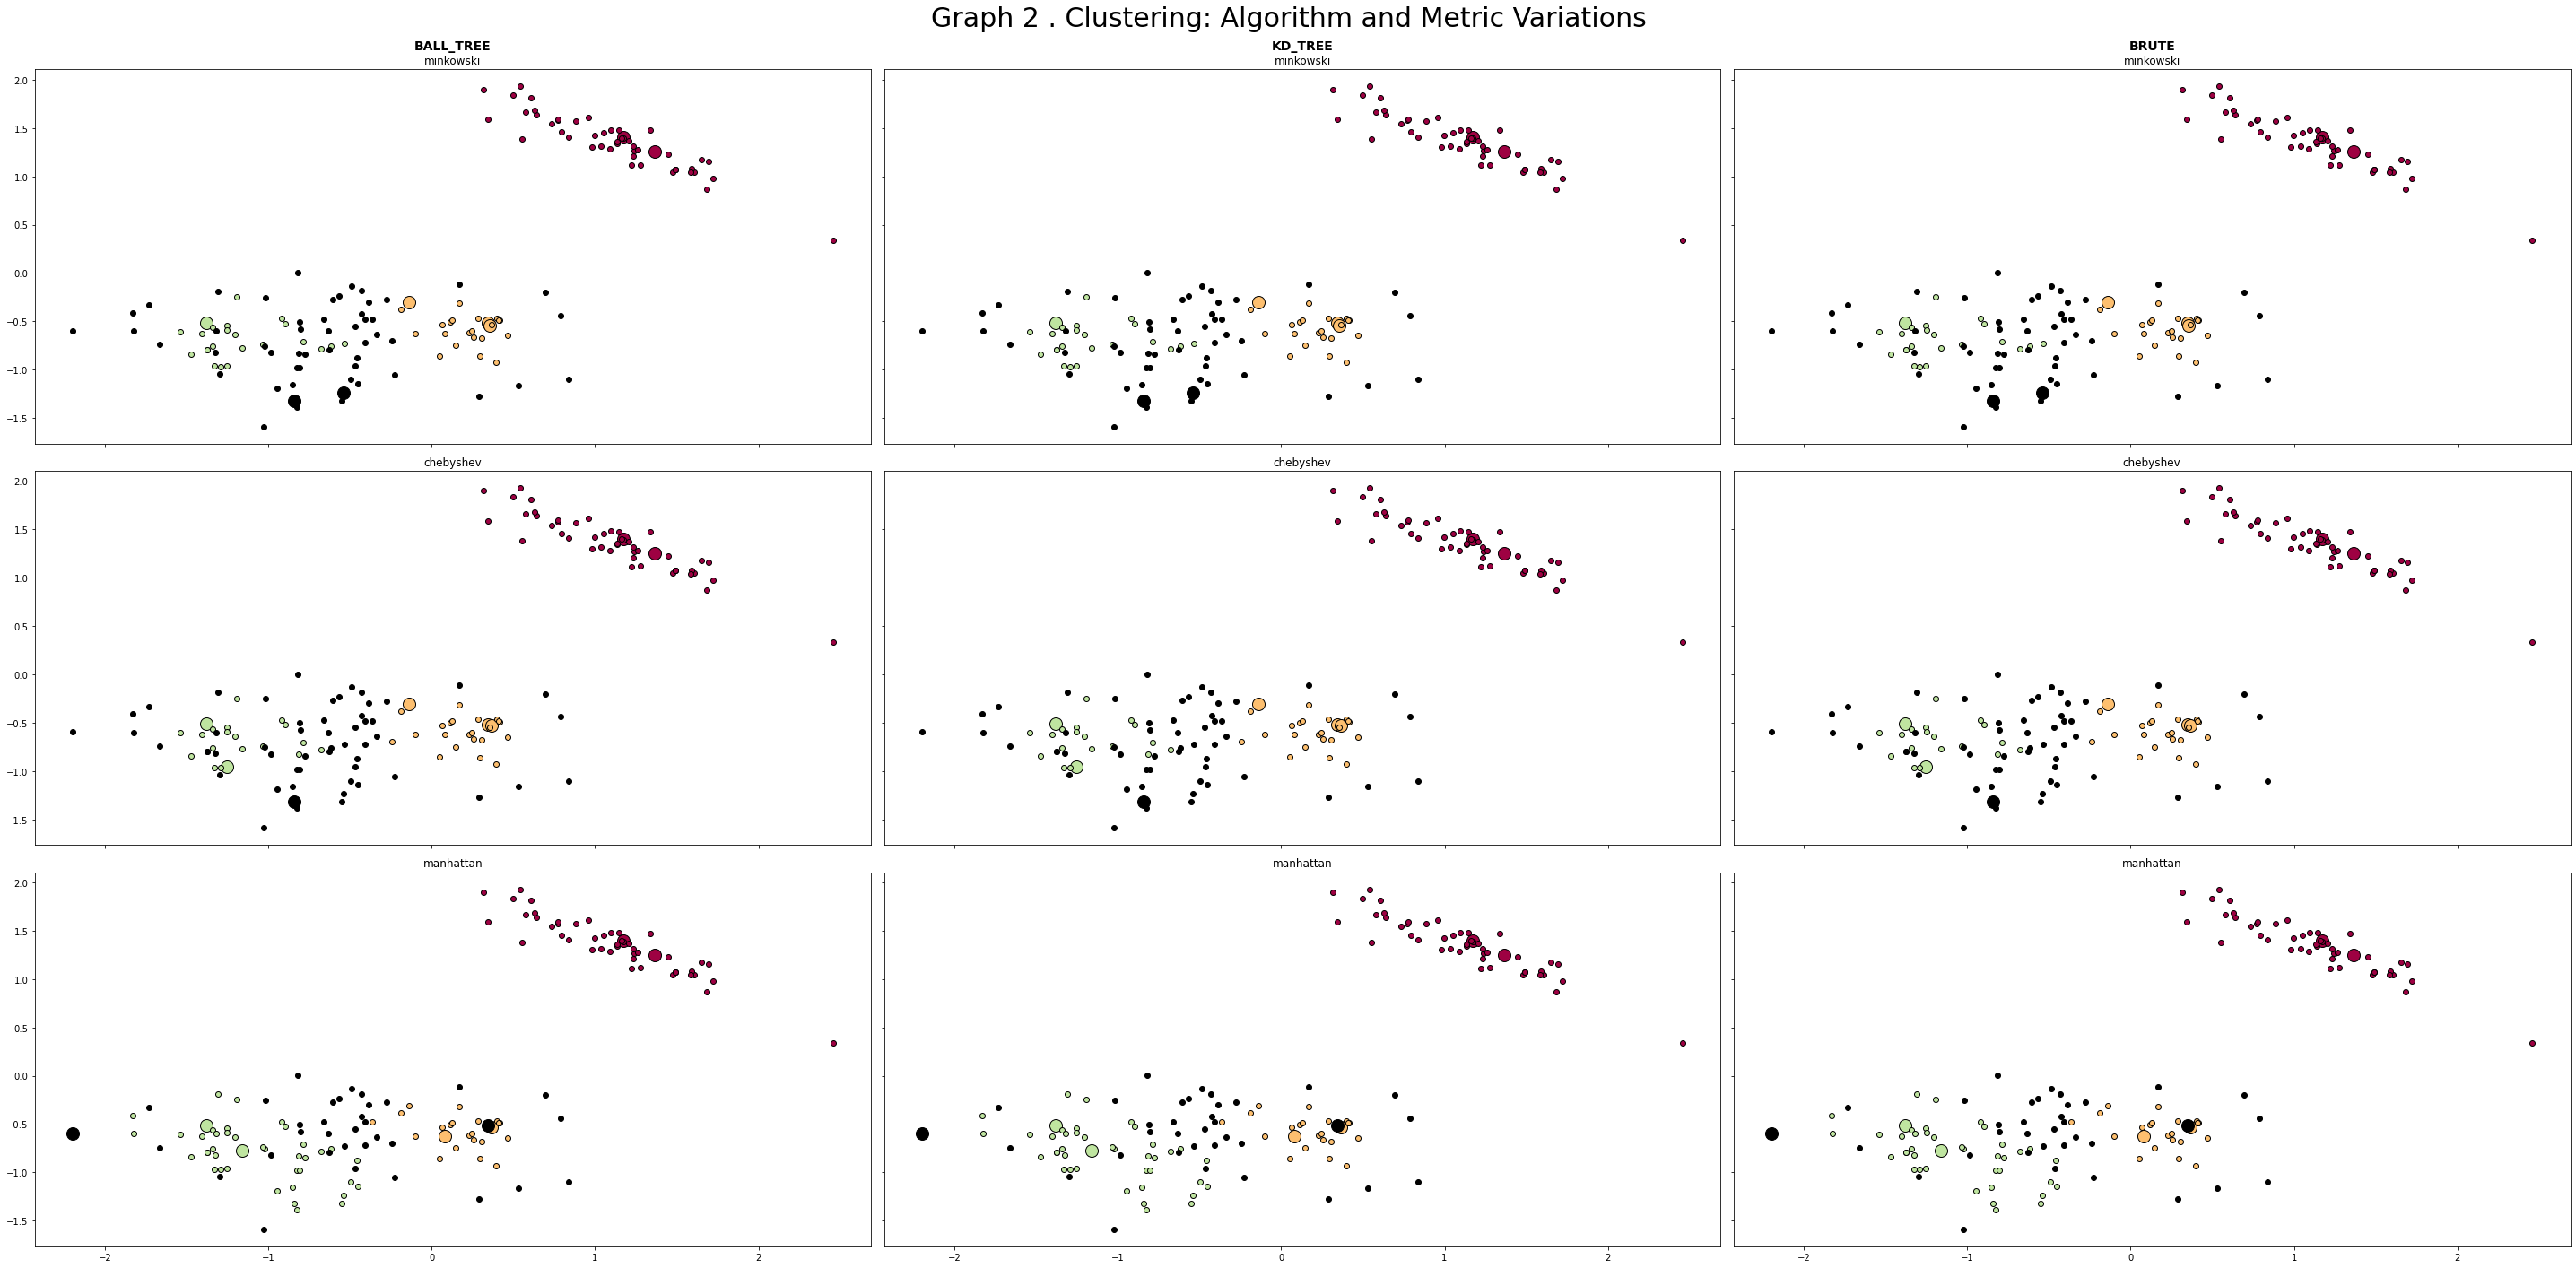

In [2]:
df, scaled_vals, Y_true = load_iris(path='./datasets/iris.arff')
dfs = optics_algs_met_make_gif(scaled_vals,Y_true,FULL_PATH,predefined='y')

In [17]:
import pandas as pd
df = pd.read_csv('Metrics_Cluster_test.csv')
df = df.drop('Unnamed: 0',axis=1)
df = df.drop(['Clusters','Noise'],axis=1)
df = df.groupby(['Algorithm','Metric']).mean()
df.to_csv('OPTICS_ALG_MET.csv')
df


Homogeneity  Completeness  V-measure  \
Algorithm Metric                                            
ball_tree chebyshev         0.58          1.00       0.73   
          euclidean         0.58          1.00       0.73   
          minkowski         0.58          1.00       0.73   
brute     chebyshev         0.58          1.00       0.73   
          euclidean         0.58          1.00       0.73   
          minkowski         0.58          1.00       0.73   
kd_tree   chebyshev         0.58          1.00       0.73   
          euclidean         0.58          1.00       0.73   
          minkowski         0.58          1.00       0.73   

                     Adjusted Rand Index  Adjusted Mutual Information  \
Algorithm Metric                                                        
ball_tree chebyshev                 0.57                         0.73   
          euclidean                 0.57                         0.73   
          minkowski                 0.57                         0.73   
brute     chebyshev                 0.57                         0.73   
          euclidean                 0.57                         0.73   
          minkowski                 0.57                         0.73   
kd_tree   chebyshev                 0.57                         0.73   
          euclidean                 0.57                         0.73   
          minkowski                 0.57                         0.73   

                     Silhouette Coefficient  
Algorithm Metric                             
ball_tree chebyshev                    0.75  
          euclidean                    0.75  
          minkowski                    0.75  
brute     chebyshev                    0.75  
          euclidean                    0.75  
          minkowski                    0.75  
kd_tree   chebyshev                    0.75  
          euclidean                    0.75  
          minkowski                    0.75

In [8]:
#X, Y_true_le = preprocess_dataset(df,ohe='n')

#scale numerical cols - 9 different ones
#num_standardized = num_col_standardize(df,graph='n')

#OPTICS - clustering #only with one of the valuess from above
test_norm, cluster, labels, optic_dict = clean_optics_cluster(X,Y,
															  MIN_SAMPLES=20,
															  METRIC='chebyshev',
															  ALG='auto',
															  DF=df,
															  graph='y')

/Users/Eric/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


<Figure size 720x540 with 0 Axes>

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 720x540 with 0 Axes>

In [ ]:
Y_true = df_cat_le['le_class'].values
Y_pred = cluster.fit_predict(X[0][1])

In [ ]:
confusion_matrix(Y_true, Y_pred)

In [ ]:
Y_true.shape, Y_pred.shape

In [ ]:
#preprocessing function: Iris 
def load_iris(path='./datasets/iris.arff'):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import normalize
    
    df = load_dataset(path)
    df['class'] = df['class'].apply(lambda x: x.decode('utf-8'))
    Y_true = df['class'].values
    
    #encoding the label 
    le = LabelEncoder()
    Y_true = le.fit_transform(Y_true)
    Y_true = pd.DataFrame(Y_true, columns=['le_class'])
    
    #normalize the values 
    df_num = df.drop('class',axis=1)
    normalized_vals = normalize(df_num.values)
    #only standard scaling
    scale = StandardScaler()
    scaled_vals = scale.fit_transform(normalized_vals)
    
    return df, scaled_vals, Y_true

df, scaled_vals, Y_true = load_iris()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize

def load_kropt(path='./datasets/kropt.arff'):
    #loading
    df = load_dataset(path)
    # the different columns here
    numeric_cols = ['white_king_row','white_rook_row','black_king_row']
    cat_cols = ['white_king_col','white_rook_col','black_king_col']
    # subsetting the dataframe 
    numeric_data = df[numeric_cols]
    cat_data = df[cat_cols]
    #utf8 decoding all the values 
    df = df.applymap(lambda x: x.decode('utf-8'))
    # sepparating the label 
    Y_true = df['game'].values
    #label encoder
    le = LabelEncoder()
    Y_true = le.fit_transform(Y_true)
    Y_true = pd.DataFrame(Y_true, columns=['le_class'])
    #ohe
    ohe = OneHotEncoder()
    ohe = ohe.fit(cat_data)
    names = ohe.get_feature_names()
    ohe_transf = ohe.transform(cat_data).toarray()
    df_ohe = pd.DataFrame(ohe_transf,columns=names)
    #numericalvalues 
    normalized_vals = normalize(numeric_data)
    #standardscaler
    scale = StandardScaler()
    scaled_vals = scale.fit_transform(normalized_vals)
    scaled_vals = pd.DataFrame(scaled_vals, columns=numeric_cols)
    transformed_df = scaled_vals.join([df_ohe,Y_true])
    #X = transformed_df.drop('le_class',axis=1)
    return transformed_df, scaled_vals, Y_true

full_df, scaled_vals, Y_true = load_kropt('./datasets/kropt.arff')
    

In [ ]:
df = load_dataset('./datasets/kropt.arff')
df = df.applymap(lambda x: x.decode('utf-8'))

In [ ]:
def load_soybean(path='./datasets/soybean.arff'):
    df = load_dataset(path)
    #decode the values from bytes to str
    df = df.applymap(lambda x: x.decode('utf-8'))
    #replace the question marks with np.nans
    df = df.replace("?",np.nan)
    #fill with 0's
    df.fillna(0)
    # we only lose 121 rows of data, not too bad, delete it all 
    df = df.dropna(axis=0)
    Y_true = df['class']
    #label encoding 
    le = LabelEncoder()
    Y_true = le.fit_transform(Y_true)
    Y_true = pd.DataFrame(Y_true, columns=['le_class'])
    #OneHotEncoding
    cat_data = df.drop('class',axis=1)
    ohe = OneHotEncoder()
    ohe = ohe.fit(cat_data)
    names = ohe.get_feature_names()
    ohe_transf = ohe.transform(cat_data).toarray()
    df_ohe = pd.DataFrame(ohe_transf,columns=names)
    transformed_df = df_ohe.join([Y_true])
    return transformed_df,Y_true

In [ ]:
#test the optics with all the metrics and algorithm combinations, we keep num samples the same
# 7 metrics and 3 algorithms 7x3 graphs 
X = scaled_vals.copy()

def optics_algs_met_make_gif(predefined='y'):
    df = load_dataset(FULL_PATH)
    import itertools
    import sklearn
    import glob
    from PIL import Image
    #Algorithms to be used 
    ALGS = ['ball_tree','kd_tree','brute']
    #metrics which are available in all three:
    a = sorted(sklearn.neighbors.VALID_METRICS['ball_tree'])
    b = sorted(sklearn.neighbors.VALID_METRICS['kd_tree'])
    c = sorted(sklearn.neighbors.VALID_METRICS['brute'])
    METRICS = list(set(a) & set(b) & set(c))
    METRICS_TO_USE = list(np.random.choice(METRICS, 3,replace=False))
    print(METRICS_TO_USE)
    #all the coordinates
    if predefined=='y':
        colrange=list(range(0,3))
        rowrange=list(range(0,3))
        COORDS = list(itertools.product(colrange,rowrange))
        alg_met = list(itertools.product(ALGS, METRICS_TO_USE))
    else: 
        colrange = list(range(0,3))
        rowrange = list(range(0,7))
        COORDS = list(itertools.product(colrange,rowrange))
        #all combinations of them
        alg_met = list(itertools.product(ALGS, METRICS))
    # testing all the combinations 
    MIN_SAMPLES = 25
    #creationg the subplot
    fig, ax = plt.subplots(len(rowrange),len(colrange),figsize=(40,20),sharey=True,sharex=True)
    #suptitle
    plt.suptitle("Graph 2 . Clustering: Algorithm and Metric Variations",fontsize=30)
    #storing info
    d = []
    #grid for title above groups
    grid = plt.GridSpec(3, 3)
    for idxx,alg in enumerate(ALGS):
            fake = fig.add_subplot(grid[idxx])
            fake.set_title(f"{alg.upper()}\n", fontweight='semibold', size=14)
            fake.set_axis_off()
    
    #starting to plot all the combinations
    for idx,combs in enumerate(alg_met):
        ALG = combs[0]
        METRIC = combs[1]
        test_norm, clustering, labels, optic_dict = clean_optics_cluster(X,
                                                                MIN_SAMPLES=MIN_SAMPLES,
                                                                METRIC=METRIC,
                                                                ALG=ALG,
                                                                graph='n',
                                                                DF=df)
        dats = (ALG,METRIC,optic_dict,cluster.get_params())
        d.append(dats)
        #plotting
        unique_labels = set(labels)
        core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
        core_samples_mask[clustering.cluster_hierarchy_] = True
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
        ROW = COORDS[idx][1]
        COL = COORDS[idx][0]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = labels == k

            xy = test_norm[class_member_mask & core_samples_mask]
            ax[ROW,COL].plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),
                                        markeredgecolor="k",
                                        markersize=14
                                        )

            xy = test_norm[class_member_mask & ~core_samples_mask]
            ax[ROW,COL].plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),
                                        markeredgecolor="k",
                                        markersize=6,
                                            )

            ax[ROW,COL].set_title(f"{METRIC}")
    plt.tight_layout()
    plt.show()
    
    cols = ['Clusters',  'Noise',  'Homogeneity',  'Completeness',  'V-measure',  'Adjusted Rand Index',  'Adjusted Mutual Information',  'Silhouette Coefficient']
    tmp_dfs = []
    for info in d: 
        indx = [info[0] + '-'+ info[1]]
        results = info[2]
        cols = info[2].keys()
        xdf = pd.DataFrame.from_records(results, columns = cols, index=indx)
        tmp_dfs.append(xdf)
    dfs = pd.concat(tmp_dfs)
    dfs = dfs.reset_index()
    dfs['Algorithm'] = dfs['index'].apply(lambda x: x.split('-')[0])
    dfs['Metric'] = dfs['index'].apply(lambda x: x.split('-')[1])
    dfs = dfs.drop('index',axis=1)

    return dfs


In [ ]:
dfs.head()

In [ ]:
# dats = (ALG,METRIC,optic_dict,cluster.get_params())
# Positions = ALGORITHM, METRIC, OPTIC DICT(RESULTS), CLUSTERING PARAMS



# OPTICS

In [ ]:
dfs.groupby(['Metric','Algorithm']).mean().describe()

In [ ]:
dfs.groupby(['Metric']).mean().plot(kind='line',subplots=True,figsize=(15,30));

In [ ]:
SAMPLE_RANGES = list(range(10,25))
SAMPLE_RANGES

In [ ]:
def plot_clusters(normalized_dataframe,clustering,labels,params_dict=None):
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
    core_samples_mask[clustering.cluster_hierarchy_] = True
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = normalized_dataframe[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),
                                      markeredgecolor="k",
                                      markersize=14
                                      )

        xy = normalized_dataframe[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),
                                       markeredgecolor="k",
                                       markersize=6,
                                           )

    plt.title(f"Estimated number of clusters: {params_dict['Clusters']}")
    plt.show()

In [ ]:
#the metrics that are
scikit_optics_metrics = ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]
algorithms = ['auto','ball_tree','kd_tree','brute']

def optic_cluster(normalized_dataframe,params_dict,graph='y'):
# Clustering starts
    clustering = OPTICS(min_samples=params_dict['min_samples'],
                        metric=params_dict['metric'],
                        algorithm=params_dict['algorithm'])
    #fitting the model
    clustering = clustering.fit(normalized_dataframe)
    #getting the data out
    labels_ordered = clustering.labels_[clustering.ordering_]
    core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
    core_samples_mask[clustering.cluster_hierarchy_] = True
    labels = clustering.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    labels_true = df_cat_le.le_class.values
    #passing to df
    test_df = pd.DataFrame(normalized_dataframe)
    test_df['labels'] = clustering.labels_
    
    d = {
    "Clusters":n_clusters_,
    "Noise":n_noise_,
    "Homogeneity":metrics.homogeneity_score(labels_true, labels),
    "Completeness": metrics.completeness_score(labels_true, labels),
    "V-measure": metrics.v_measure_score(labels_true, labels),
    "Adjusted Rand Index": metrics.adjusted_rand_score(labels_true, labels),
    "Adjusted Mutual Information":metrics.adjusted_mutual_info_score(labels_true, labels),
    "Silhouette Coefficient": metrics.silhouette_score(test_df, labels),
    }
    #plotting the clusters
    if graph =='y':
        plot_clusters(normalized_dataframe,clustering,labels,d)
        return clustering, labels,d
    else:
        return clustering, labels, d
    


In [ ]:
cluster, labels,perf_d = optic_cluster(test_norm,optics_params,graph='y')

In [ ]:

# ######################################a#######################################
# Plot result
import matplotlib.pyplot as plt